<a href="https://colab.research.google.com/github/tayabba-19/Smart-Premium-Predicting-Insurance-Costs-with-Machine-Learning/blob/main/Smart_Premium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Smart Premium: Predicting Insurance Costs with Machine Learning**

***Tayabba Zabeen***

Predicting insurance costs is a crucial task in the insurance industries as ithelps insurance companies determine fair  premium amounts for customers while managing financial risk. insurance charges depend on several factors such as age, gender,smoking habits,number of dependents and region.

With the rapid growth of data and advancements in machine learning ,it has become possible to analyze large datasets and identify complex patterns that traditional statistical methods may fail to capture.Machine learning models can learn from historical insurance data and acurately predict future medical insurance costs based on customer attributes.

In this project, machine learning techiniques are used to build predictive models that estimate individual insurance charges.These predictions can assist insurance providers in pricing plocies more effectively and help customers understand how different factors influence their insurance costs. Overall,this approach improves decision-making,reduces financial uncertainty and enhances transparency in insurance pricing.

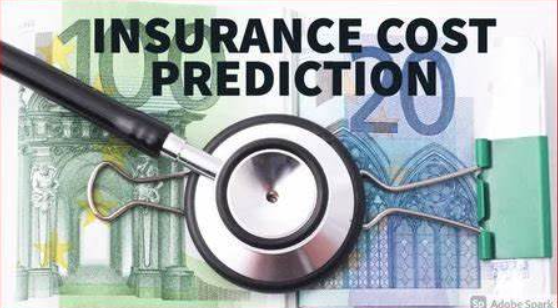

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import warnings
warnings.filterwarnings('ignore')


Loading Data into Pandas dataframe

In [ ]:
df = pd.read_csv('../input/insurance-premium-prediction/insurance.csv')

In [ ]:
df.shape

In [ ]:
(1048574,20)

In [ ]:
df.columns


Index(['age', 'gender' , 'marital status', 'annual income', 'no. of dependents', 'education level', 'occupation', 'health score', 'location', 'policy type','previous claims','vehicle age','credit score','insurance duration','premium amount','policy start date','customer feedback','smoking status','exercixe frequency','property type'], dtype='object')

From above we can conclude that there are 1048574 entries with twenty features

In [ ]:
df.head()

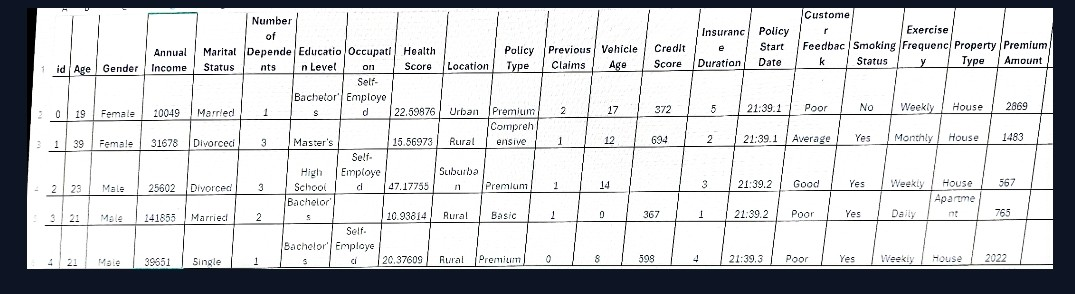

In [ ]:
df.info()

In [ ]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048574 entries, 0 to 1048573
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  ------
 0   age                    1048574 non-null   int64
 1   gender                 1048574 non-null   object
 2   marital status         1048574 non-null   float64
 3   annual income          1048574 non-null   int64
 4   no. of dependents      1048574 non-null   int64
 5   education level        1048574 non-null   object
 6   occupation             1048574 non-null   object
 7   health score           1048574 non-null   float64
 8   location               1048574 non-null   int64
 9   policytype             1048574 non-null   object
 10  previous claims        1048574 non-null   float64
 11  vehicle age            1048574 non-null   int64
 12  credit score           1048574 non-null   float64
 13  insurance duration     1048574 non-null   object
 14  propertytype           1048574 non-null   int64
 15  policy start duration  1048574 non-null   float64
 16  customer feedback      1048574 non-null   object
 17  smoking status         1048574 non-null   int64
 18  exercise frequency     1048574 non-null   float64
 19  premium amount         1048574 non-null   object

 dtypes: float64(6), int64(7), object(7)
  memory usage: 125,723 KB

In [ ]:
df.describe()

In [ ]:
              age            annual income          childern            premium amount
count      1048574.000        1048574.000          1048574.000           1048574.000
mean	     39.207025          30.665471            1.094918              13270.422414
std	       14.049960          6.098382             1.205493              12110.011240
min	       18.000000          16.000000            0.000000              1121.870000
25%	       27.000000          26.300000            0.000000              4740.287500
50%	       39.000000          30.400000            1.000000              9382.030000
75%        51.000000          34.700000            2.000000              16639.915000
max	       64.000000          53.100000            5.000000              63770.430000




From above we can see that distribution of Age is between 18 to 64

In [ ]:
df.isna().sum()

In [ ]:
age                 0
gender              0
marital status      0
annual income       0
no. of dependents   0
education level     0
occupation          0
health score        0
location            0
policytype          0
previous claims     0
vehicle age         0
credit score        0
insurance duration  0
propertytype        0
excercise frequency 0
smoking status      0
customer feedback   0
policy start date   0
premium amount      0

dtype: int64






There are no missing Values in the data

In [ ]:
df1=df


In [ ]:
df1['gender'].value_counts()

male      526890
female    521685
Name: gender, dtype: int64



In [ ]:
df1.location.value_counts()

urban     347295
rural     350018
suburban  351262

Name: location, dtype: int64






In [ ]:
plt.title("Distribution Of Age",fontsize=25)
bp1=sns.histplot(x='age',data=df1,bins=46,color='orange')
bp1.set_xlabel("Age", fontsize=16)
bp1.set_ylabel("Count", fontsize=16)

In [ ]:
Text(0, 0.5, 'Count')

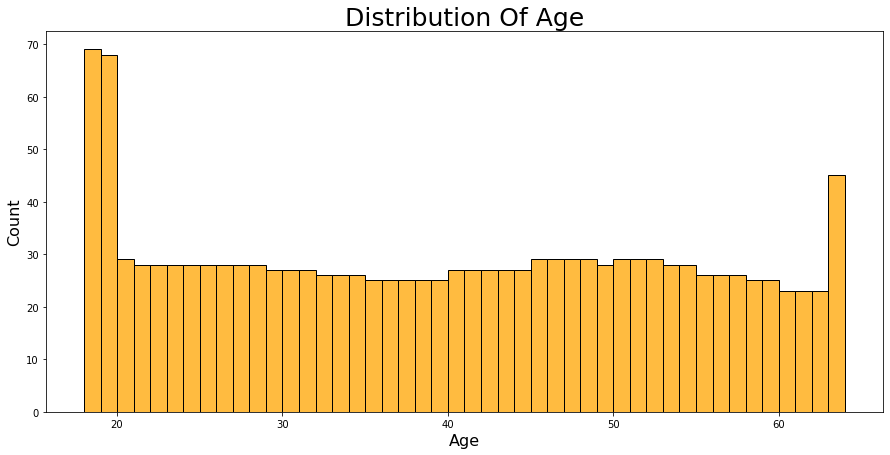

In [ ]:
sns.histplot(x='premium amount',data=df1)

In [ ]:
<AxesSubplot:xlabel='premium amount', ylabel='Count'>

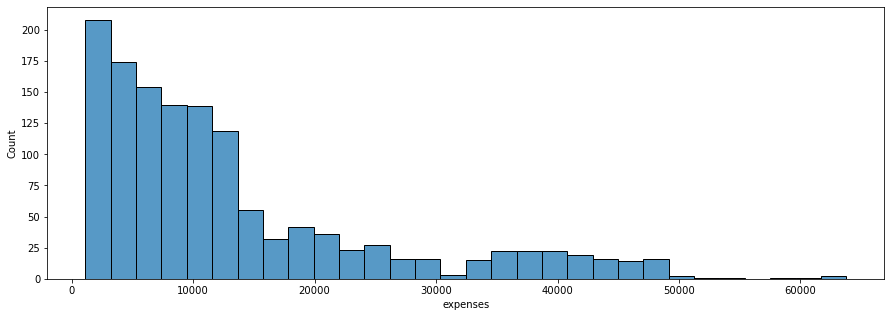

In [ ]:
sns.boxplot(x='premium amount',data=df1)


In [ ]:
<AxesSubplot:xlabel='premium amount'>

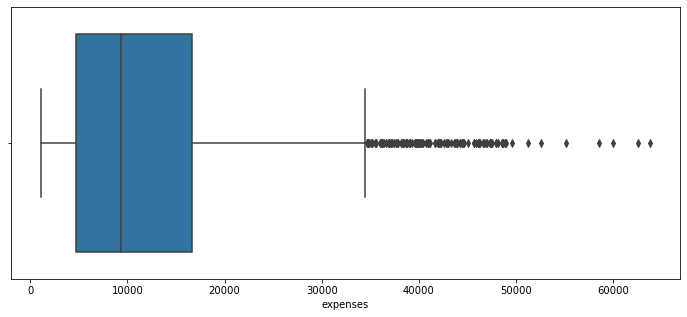

From above barplot it is clear that there are some outliers in feature called expenses

In [ ]:
bp2=sns.countplot(x='smoker',data=df1)
bp2.set_xlabel("smokers", fontsize=16)
bp2.set_ylabel("count", fontsize=16)

In [ ]:
Text(0, 0.5, 'count')

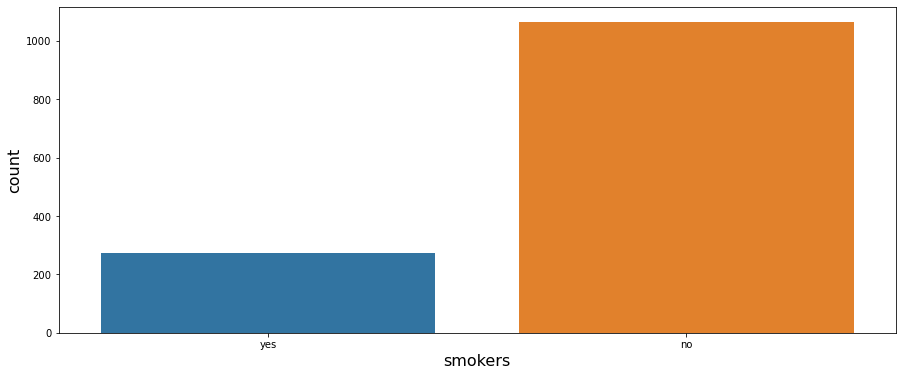

Non smokers are more compared to smokers

In [ ]:
plt.title("Smoker Vs premium amount",fontsize=25)
bp3=sns.barplot(x='smoker',y='premium amount',data=df1)
bp3.set_xlabel("premium amount", fontsize=16)
bp3.set_ylabel("smokers", fontsize=16)

In [ ]:
Text(0, 0.5, 'smokers')

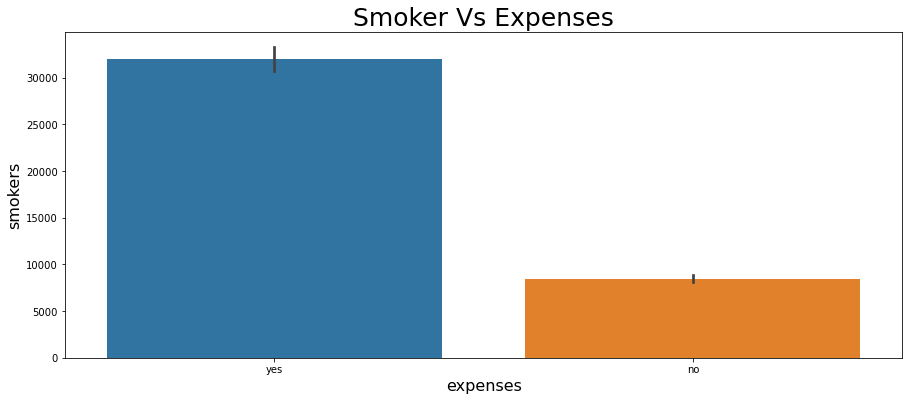

In [ ]:
bp4=sns.barplot(x='children',y='expenses',data=df1)
bp4.set_xlabel("childrens", fontsize=16)
bp4.set_ylabel("expenses", fontsize=16)

In [ ]:
Text(0, 0.5, 'expenses')

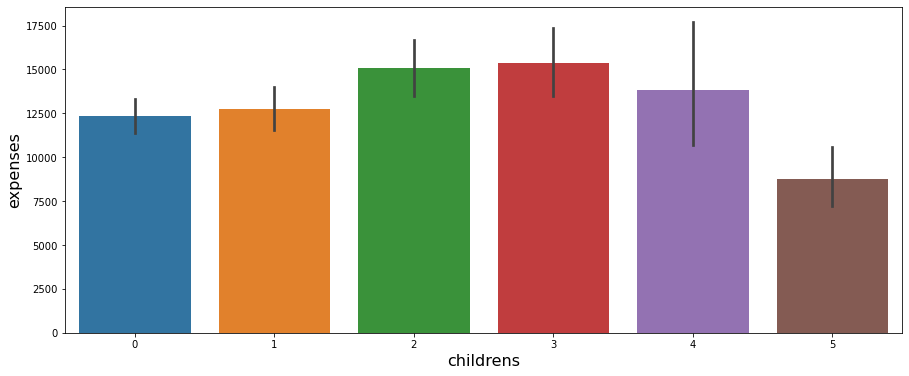

In [ ]:
bp6=sns.countplot(x=df1.smoker,hue=df1.gender)
bp6.set_xlabel("smoker", fontsize=16)
bp6.set_ylabel("count", fontsize=16)


In [ ]:
Text(0, 0.5, 'count')


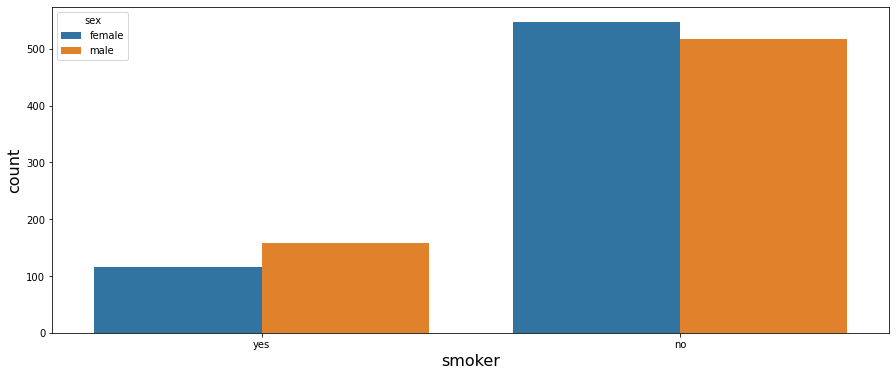

In [ ]:
isSmoker=(df1['smoker']=='yes')
notsmoker=(df1['smoker']=='no')


In [ ]:
df1.loc[isSmoker,'smoker']=1
df1.loc[notsmoker,'smoker']=0

In [ ]:
Urbanlocation=(df1['location']=='urban')
Rurallocation=(df1['location']=='rural')
Suburbanlocation=(df1['location']=='suburban')


In [ ]:
df1.loc[Urbanlocation,'location']=1
df1.loc[Rurallocation,'location']=2
df1.loc[Suburbanlocation,'location']=3

In [ ]:
men=(df1['gender']=='male')
women=(df1['gender']=='female')

In [ ]:
df1.loc[men,'gender']=1
df1.loc[women,'gender']=0

In [ ]:
convert_dict={'gender':float,'smoker':float,'location':float}

In [ ]:
df1=df1.astype(convert_dict)


In [ ]:
df1.premium amount.corr(df1.smoker)

In [ ]:
0.7872514298985541

In [ ]:
sns.pairplot(data=df1,hue='smoker')


In [ ]:
<seaborn.axisgrid.PairGrid at 0x7f9fb6623790>

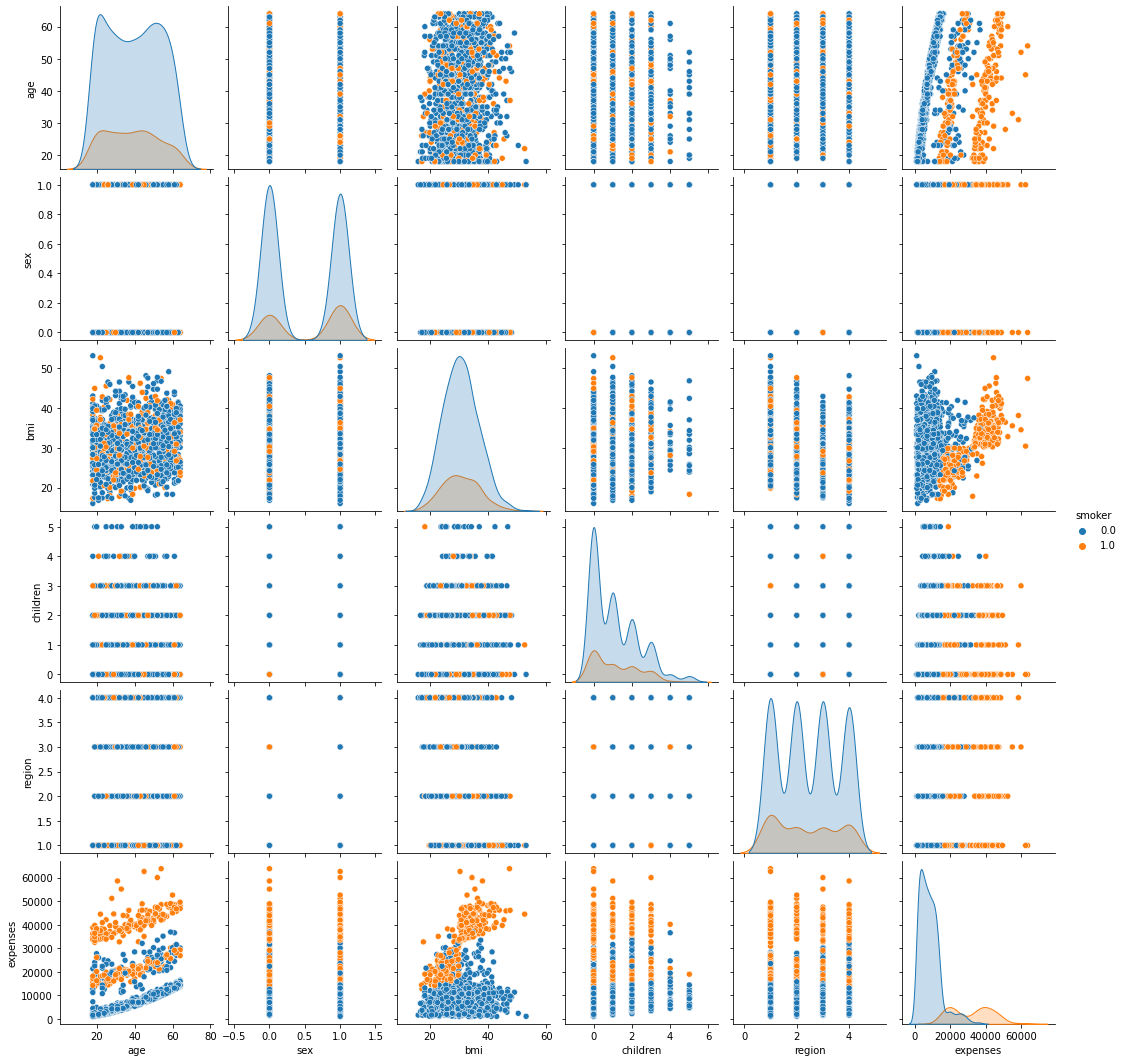

**Applying Machine Learning Models**

In [ ]:
X=df1.drop(['premium amount'],axis=1)
Y=df1['premium amount']


**Dividing the data into train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import cross_val_predict

In [ ]:
def model_summary(model, model_name, cvn=20): # Default value for cvn = 20
    print(model_name)
    y_pred_model_train = model.predict(x_train)
    y_pred_model_test = model.predict(x_test)
    R2Score_model_train = r2_score(y_train, y_pred_model_train)
    print("Training R2 Score: ", R2Score_model_train)
    R2Score_model_test = r2_score(y_test, y_pred_model_test)
    print("Testing R2 Score: ",  R2Score_model_test)
    RMSE_model_train = sqrt(mean_squared_error(y_train, y_pred_model_train))
    print("RMSE for Training Data: ", RMSE_model_train)
    RMSE_model_test = sqrt(mean_squared_error(y_test, y_pred_model_test))
    print("RMSE for Testing Data: ", RMSE_model_test)
#     if model == polynomial_reg:
#         polynomial_features = PolynomialFeatures(degree=3)
#         y_pred_cv_PR = cross_val_predict(model, polynomial_features.fit_transform(X), y, cv=20)
#     else:
    y_pred_cv_model = cross_val_predict(model, X, Y, cv=cvn)
    accuracy_cv_model = r2_score(Y, y_pred_cv_model)
    print("Accuracy for", cvn,"- Fold Cross Predicted: ", accuracy_cv_model)

1) Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

In [ ]:
LinearRegression()


In [ ]:
model_summary(regressor, "Multiple_linear_Regression")

Multiple_linear_Regression
Training R2 Score:  0.7370016151361498
Testing R2 Score:  0.7998296193361614
RMSE for Training Data:  6140.445096976811
RMSE for Testing Data:  5643.8555314010555
Accuracy for 20 - Fold Cross Predicted:  0.7472738794666414

**Applying Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)
decision_tree_reg.fit(x_train, y_train)
model_summary(decision_tree_reg, "Decision_Tree_Regression")


Decision_Tree_Regression
Training R2 Score:  0.8729818821059496
Testing R2 Score:  0.8348947400286508
RMSE for Training Data:  4267.329210234343
RMSE for Testing Data:  5125.7383763305415
Accuracy for 20 - Fold Cross Predicted:  0.8498632643795985

**Applying Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_forest_reg=RandomForestRegressor()
random_forest_reg.fit(x_train,y_train)

RandomForestRegressor()


In [ ]:
model_summary(random_forest_reg,"Random_Forest_Regressor")

Random_Forest_Regressor
Training R2 Score:  0.9749878579346102
Testing R2 Score:  0.8811859765159049
RMSE for Training Data:  1893.6458275473406
RMSE for Testing Data:  4348.203209984781
Accuracy for 20 - Fold Cross Predicted:  0.8371867117154174

**Applying XGBoost**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_r = xgb.XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123,verbosity=0)

# Fitting the model
xgb_r.fit(x_train, y_train)

# Predict the model
pred = xgb_r.predict(x_test)


In [ ]:
model_summary(xgb_r,"Xg_boost")
Xg_boost
Training R2 Score:  0.9132700849166746
Testing R2 Score:  0.8864202080281152
RMSE for Training Data:  3526.2067504045162
RMSE for Testing Data:  4251.346620624632
Accuracy for 20 - Fold Cross Predicted:  0.8477346692178661

We got R2 Score of 88.64% and Root mean square error of 4251 for test data

From above we conclude that XGBoost has maximum R2 Score and minimum Root Mean Square Error as compsared to other ML model

**Conclusion**

This project focuses on automating and improving  the accuracy of insurance premium using machine learning techniques.By analyzing key factors such as age,smoking habits etc. the model effectively predicts insurance costs.

The analysis shows that smoking status,age and so on have the most significant impact on insurance premiums. After training and evaluating multiple machine learning models,Random Forest/Gradient Boosting achieved the best performance,resulting in higher prediction accuracy.

A machine learning-based prediction system helps insurance companies calculate premium in a fair, transparent and data-driven manner. It also enables personalized premium estimation for customers while improving risk assessment for insurers.

Overall,the Smart Premium System demonstrates strong potential to enhance cost optimization,reduce risk and increase customer satisfaction in the insurance industry.